# Title
> Small summary

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [cathegory 1, other cathegory]
- image: images/post_image_generic.jpg
- hide: false
- search_exclude: false
- author: Joao Rodrigues

In [12]:
master_seed = 42

import matplotlib.pyplot as plt
import numpy as np

In [13]:
rand = np.random.default_rng(master_seed)

In [14]:
mu    = np.array([0.01, 0.02])
rho   = 0.5
sig   = np.array([0.5, 0.7])
n     = 500


cov   = np.array([[sig[0]*sig[0], sig[0]*sig[1]*rho], [sig[1]*sig[0]*rho, sig[1]*sig[1]]]) 
cov

array([[0.25 , 0.175],
       [0.175, 0.49 ]])

In [15]:
f_kelly = (mu.T)@np.linalg.inv(cov)
f_kelly

array([0.0152381 , 0.03537415])

In [16]:
r = rand.multivariate_normal(mu, cov, size=n)

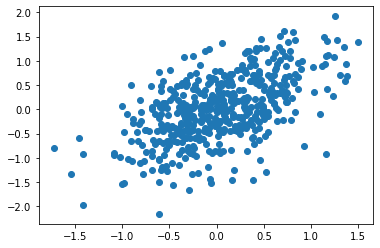

In [17]:
plt.scatter(r[:,0], r[:,1])

Calculates portfolio returns

In [18]:
portfolio_returns = np.sum(f_kelly*r, 1)

In [19]:
def calculate_Sharpe_ratio(r):
    return (np.mean(r)/np.std(r))*np.sqrt(252)

In [20]:
calculate_Sharpe_ratio(r=portfolio_returns)

0.7483567799683888

In [21]:
portfolio = np.cumprod(1+portfolio_returns)

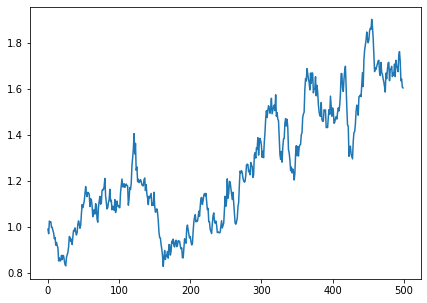

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5))
axes.plot(portfolio)

Observation: Is the estimation of cov more stable than the estimation of mu?
Actually now I'm assuming mu and sigma are estimated without uncertainty

optimal kelly:

In [ ]:
N = 100  # number of realizations
n = 1000 # number of observations

In [ ]:
class Sampler_Seed():
    def __init__(self, seed):
        self.rand = np.random.default_rng(seed)   
        
    def draw(self):
        return self.rand.integers(1, 1e10, size=1, dtype=int)[0]
    
sampler_seed = Sampler_Seed(seed=master_seed)

In [ ]:
def run_experiment(N, n, mu, cov):
    
    # Samples a random seed
    rand = np.random.default_rng(sampler_seed.draw())
    
    # Samples the returns
    r = rand.multivariate_normal(mu, cov, size=n)
    
    # Calculates the sample mean and sample covariance
    mu_  = np.mean(r, axis=0)
    cov_ = np.cov(r.T)
    
    # Calculates the Kelly optimal fraction
    f_kelly = (mu_.T)@np.linalg.inv(cov_)
    
    # Calculates
    
    
    